In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('data loading')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)

print(len(input_train), 'train sequence')
print(len(input_test), 'test sequence')

print('sequence padding')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print(input_train.shape, 'input train shape')
print(input_test.shape, 'input test shape')

data loading
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequence
25000 test sequence
sequence padding
(25000, 500) input train shape
(25000, 500) input test shape


In [3]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense

max_feature = 10000

model = Sequential()
model.add(Embedding(max_feature,32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.5323 - acc: 0.7588 - val_loss: 0.3605 - val_acc: 0.8636
Epoch 2/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.3098 - acc: 0.8787 - val_loss: 0.2965 - val_acc: 0.8820
Epoch 3/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.2360 - acc: 0.9105 - val_loss: 0.6193 - val_acc: 0.8094
Epoch 4/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.2034 - acc: 0.9262 - val_loss: 0.3836 - val_acc: 0.8290
Epoch 5/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.1810 - acc: 0.9342 - val_loss: 0.2987 - val_acc: 0.8908
Epoch 6/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.1583 - acc: 0.9420 - val_loss: 0.2957 - val_acc: 0.8844
Epoch 7/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.1490 - acc: 0.9470 - val_loss: 0.4622 - val_acc:

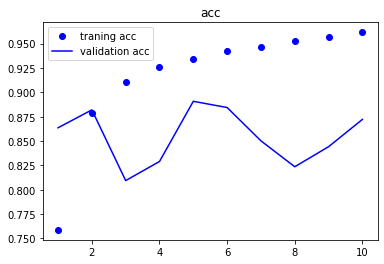

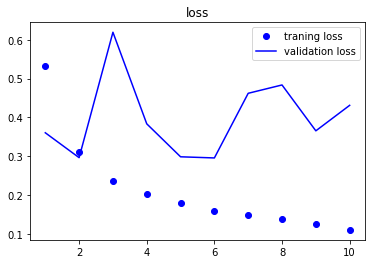

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print()
epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='traning acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='traning loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('loss')
plt.legend()

plt.show()